In [28]:
#pip install nolds

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nolds
from MHP import MHP
import inspect

# Import sample data

Using S&P 500 data from Nov-2014 to Nov-2019. Will just use opening price to make life easy

[Source: Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history?period1=1415145600&period2=1572912000&interval=1d&filter=history&frequency=1d)

In [30]:
s_and_p_data = pd.read_csv('S&P5yrSample.csv',index_col = 'Date', usecols = ['Date','Open'])

In [31]:
s_and_p_data.head(10)

,Open
Date,
2014-11-05,2015.290039
2014-11-06,2023.329956
2014-11-07,2032.359985
2014-11-10,2032.010010
2014-11-11,2038.199951
2014-11-12,2037.750000
2014-11-13,2039.209961
2014-11-14,2039.739990
2014-11-17,2038.290039


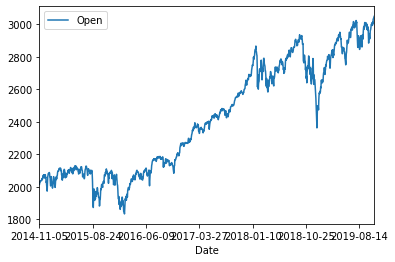

In [32]:
s_and_p_data.plot()

# Hawkes process

In [33]:
from MHP import MHP
import numpy as np
P = MHP()
P.generate_seq(60)

Max eigenvalue: 0.50000


array([[4.0302778458981745, array([0])],
       [7.385378061899256, array([0])],
       [8.542082921594135, array([0])],
       [9.44041402581903, array([0])],
       [10.473277424318846, array([0])],
       [10.525428172989711, array([0])],
       [10.904815241218692, array([0])],
       [12.853121051111618, array([0])],
       [26.230385013064048, array([0])],
       [45.43670888062401, array([0])]], dtype=object)

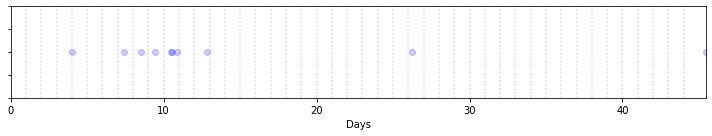

In [34]:
P.plot_events()

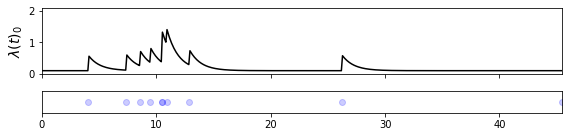

In [35]:
P.plot_rates()

# Lyapunov exponent

## Nolds


In [36]:
?nolds.lyap_e

In [37]:
print(inspect.getsource(nolds.lyap_e))

def lyap_e(data, emb_dim=10, matrix_dim=4, min_nb=None, min_tsep=0, tau=1,
           debug_plot=False, debug_data=False, plot_file=None):
  """
  Estimates the Lyapunov exponents for the given data using the algorithm of
  Eckmann et al. [le_1]_.

  Recommendations for parameter settings by Eckmann et al.:
    * long recording time improves accuracy, small tau does not
    * use large values for emb_dim
    * matrix_dim should be 'somewhat larger than the expected number of
      positive Lyapunov exponents'
    * min_nb = min(2 * matrix_dim, matrix_dim + 4)

  Explanation of Lyapunov exponents:
    The Lyapunov exponent describes the rate of separation of two
    infinitesimally close trajectories of a dynamical system in phase space.
    In a chaotic system, these trajectories diverge exponentially following
    the equation:

    \|X(t, X_0) - X(t, X_0 + eps)| = e^(lambda * t) * \|eps|

    In this equation X(t, X_0) is the trajectory of the system X starting at
    the point X_0 i

In [38]:
print(inspect.getsource(nolds.lyap_r))

def lyap_r(data, emb_dim=10, lag=None, min_tsep=None, tau=1, min_neighbors=20,
           trajectory_len=20, fit="RANSAC", debug_plot=False, debug_data=False,
           plot_file=None, fit_offset=0):
  """
  Estimates the largest Lyapunov exponent using the algorithm of Rosenstein
  et al. [lr_1]_.

  Explanation of Lyapunov exponents:
    See lyap_e.

  Explanation of the algorithm:
    The algorithm of Rosenstein et al. is only able to recover the largest
    Lyapunov exponent, but behaves rather robust to parameter choices.

    The idea for the algorithm relates closely to the definition of Lyapunov
    exponents. First, the dynamics of the data are reconstructed using a delay
    embedding method with a lag, such that each value x_i of the data is mapped
    to the vector

    X_i = [x_i, x_(i+lag), x_(i+2*lag), ..., x_(i+(emb_dim-1) * lag)]

    For each such vector X_i, we find the closest neighbor X_j using the
    euclidean distance. We know that as we follow the trajectories

In [39]:
nolds.lyap_r(s_and_p_data)

/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 314
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


IndexError: index 1257 is out of bounds for axis 0 with size 1257

## Rosenstein's method

### Create phase space matrix